# Observation of Kerr effect 

The physical model used to describe this effect :

\begin{equation}
    \frac{\partial E}{\partial z} = \frac{i}{2k}\nabla^2_{\bot}E + i\frac{\omega}{c}(1-f)n_{2}\left|E\right|^2E
\end{equation}

We use spectral method to solve this equation numerically, so in order to verify the numerical solution, we compare the solution with analytic solution :



/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


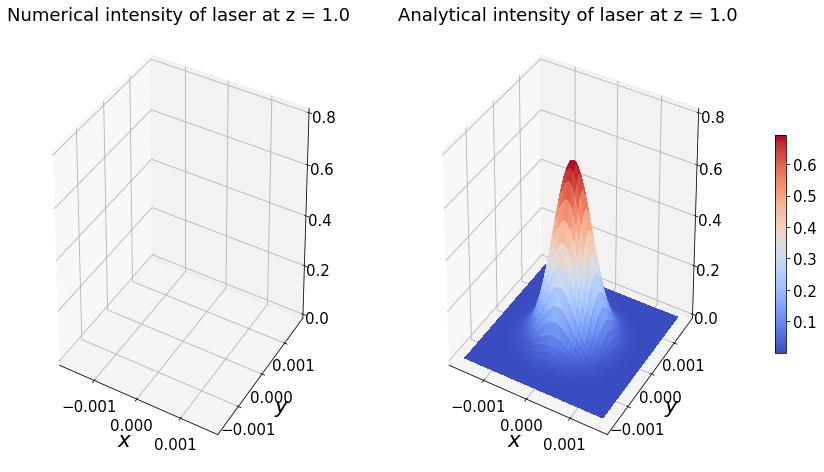

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#Zoom the figure in matplotlib
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['font.size'] = 15
mpl.rcParams['axes.labelsize'] = 'x-large'
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['lines.markersize'] = 10.0

#Parameter for initialize laser
w0 = 0.7*1e-3
Pcr = 1.7*1e9
p = 4
Pin = p*Pcr
lamb = 790*1e-9
k = 2*np.pi/lamb
nb_save = 10

#spacial discretization along x and y, need to be the same as production codes
L = 16*1e-4
N = 64
Lz = 1.0
Nz = 1000
r, d = np.linspace(-L, L, 2*N, retstep=True) 
x, y = np.meshgrid(r,r)

#Analytic solution
E0 = (2*Pin/(np.pi*w0**2))**(1/2)*1e-8
w = lambda z : w0*(1 + (2*z/(k*w0**2))**2)**(1/2)
square = np.vectorize(lambda x,y : x**2+y**2 )
xy2 = square(x,y)

def inten_analy(z):
    return (E0*w0/w(z)*np.exp(-xy2/w(z)**2))**2

#Numerical solution
inten_num = np.loadtxt("../results/intensity_kerr.txt")
inten_num = inten_num.reshape((101, 2*N, 2*N))

#3D comparison between numerical and analytical solution at arbitary z
axes = []
surfs = []
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(121,projection='3d')
ax.title.set_text('Numerical intensity of laser at z = 1.0')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_num[-1],cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax = fig.add_subplot(122,projection='3d')
ax.title.set_text('Analytical intensity of laser at z = 1.0')
ax.set_zlim(0, 0.8)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
axes.append(ax)
surf = ax.plot_surface(x,y,inten_analy(-1),cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, ax=axes,shrink=0.5, aspect=20)

plt.show()

# save figure as pdf
#plt.savefig("../figures/observables.pdf")

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


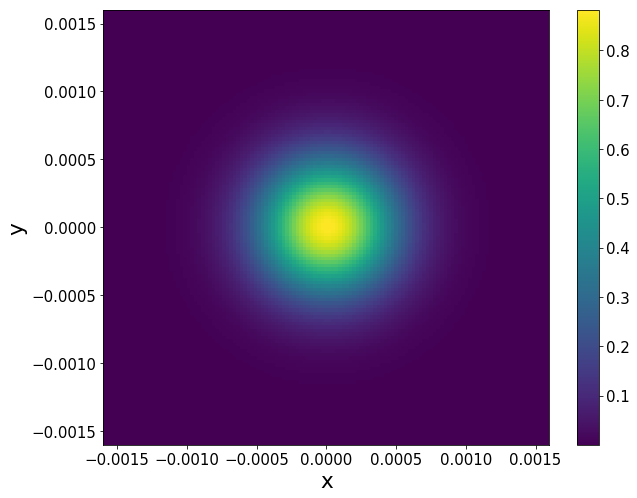

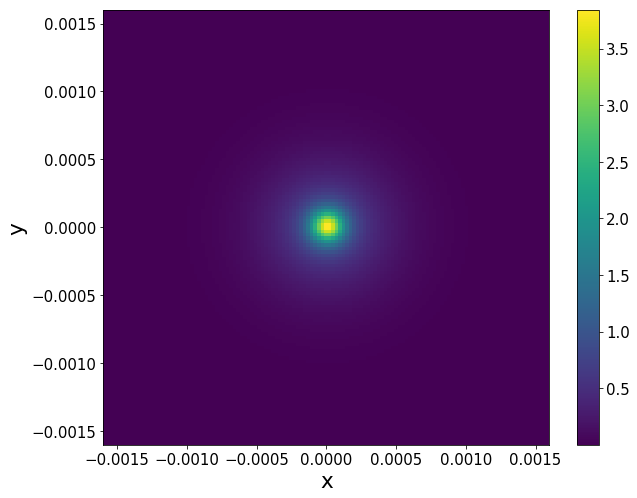

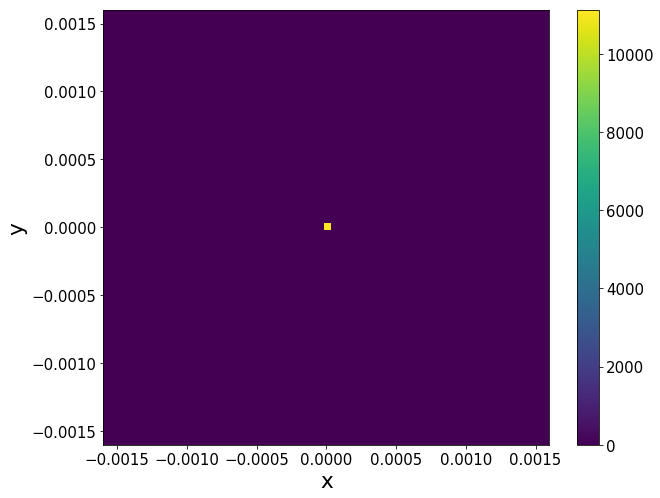

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


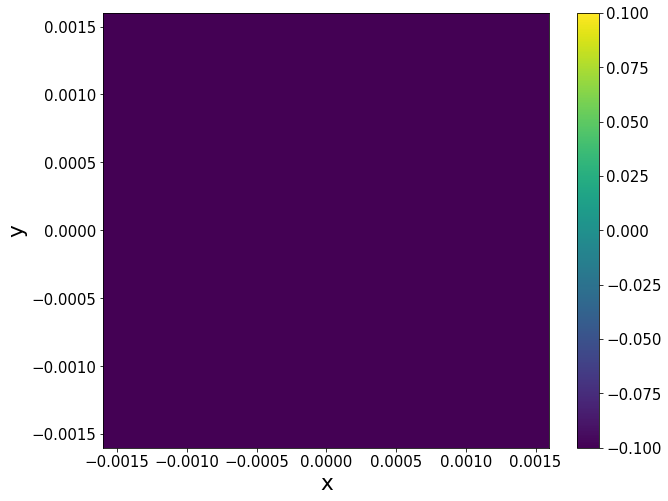

In [18]:
for z in [0, 0.499, 0.6, Lz]:
    fig, ax = plt.subplots()
    pic = int(z*Nz/Lz/nb_save)
    #print(pic)
    mesh = ax.pcolormesh(x, y, inten_num[pic])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.colorbar(mesh, ax=ax)
    fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


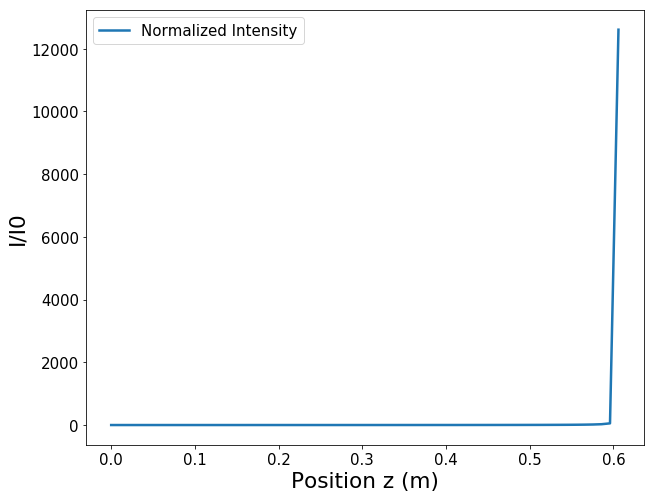

In [23]:
list_div = []
for i in range(inten_num.shape[0]-1):
    div = np.max(inten_num[i])
    list_div.append(div)
list_div = np.asarray(list_div)
#print(list_div)
norm = list_div[0]
x = np.linspace(0, Lz, Nz/nb_save)
fig, ax = plt.subplots()
ax.plot(x, list_div/norm, label = 'Normalized Intensity')
ax.set_xlabel('Position z (m)')
ax.set_ylabel('I/I0')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

# Finding the collapse point

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


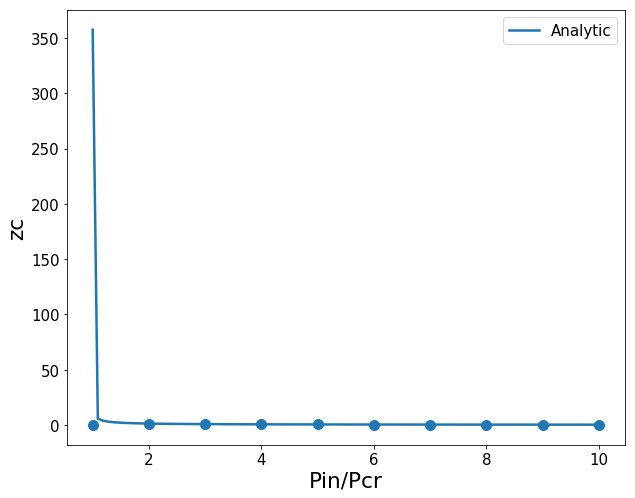

In [30]:
point_div = np.loadtxt("../results/intensity_kerr_divergence.txt")

zR = k*w0**2/2
def analytic_zc(p):
    return 0.367*zR/((p**(1/2) - 0.852)**2 - 0.0219)**(1/2)

fig, ax = plt.subplots()
x = np.linspace(1, 10, 100)
#print(x)
#print(point_div)
p = np.linspace(1, 10, 10)
ax.scatter(p, point_div)
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()

/usr/local/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


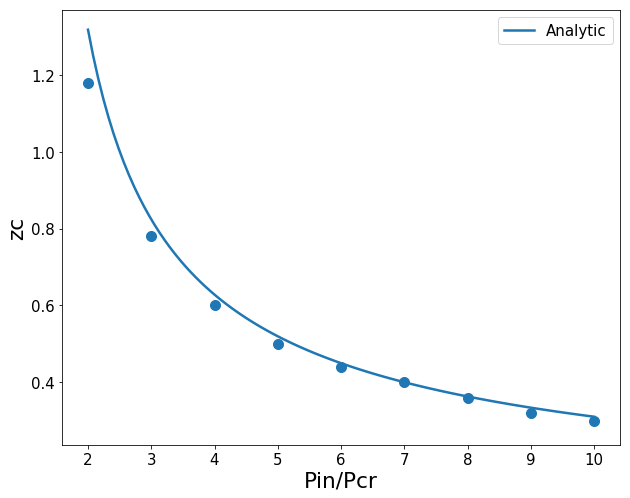

In [29]:
point_div2 = []
for i in range(len(point_div) -1):
    point_div2.append(point_div[i+1])
point_div2 = np.asarray(point_div2)

fig, ax = plt.subplots()
x = np.linspace(2, 10, 100)
p = np.linspace(2,10,9)
ax.scatter(p, point_div2)
ax.plot(x, analytic_zc(x), label = 'Analytic')
ax.set_xlabel('Pin/Pcr')
ax.set_ylabel('zc')
ax.legend()
#plt.ylim(4.5, 5.5)
fig.show()